# Skin Disorder Prediction using Machine Learning 🩺

# 1. Business Understanding

- **Problem** : Dermatologist face difficulty in diffetentiating erthemato-squamous skin diseases at early stages due to overlapping symtoms.

- **Objective** : To Perform comprehensive EDA and build ML classification models to predict the type of skin diseases based on clinical symptoms, histopathlogocial features, age and fmaily history.

- **Goal** : Assist doctors in early and accurate diagnosis, reducing dependency on invasive procedures.



# 2. Data Understanding

- Dataset contains 35 attributes:
- 34 input features describe the patient (symptoms + biopsy + age)
- 1 target variable `class` tells which disese the patient has
- 6 different skin diseases in total:


   1.  Psoriasis
   2.  Seborrheic dermatitis
   3. Lichen planus
   4. Pityriasis rosea
   5. Chronic dermatitis
   6. Pityriasis rubra pilaris

These diseases exhibit very similar clinical symptoms such as erythema and scaling, especially in their early stages, which makes manual diagnosis challenging.





## 2.1  Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV

# Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

data = pd.read_csv("/kaggle/input/datasets/shravani1324/dermatology/dermatology.csv")

In [2]:
data.head(10)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
5,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2
6,2,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,18,5
7,2,2,3,3,3,3,0,2,0,0,...,2,2,3,2,0,0,3,3,57,3
8,2,2,1,0,2,0,0,0,0,0,...,0,0,2,0,0,0,2,0,22,4
9,2,2,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,30,4


## 2.2 Rows and Columns

In [3]:
# Rows and Columns

print(f"Dermatology Dataset has {data.shape[0]} Rows and {data.shape[1]} Columns")

Dermatology Dataset has 366 Rows and 35 Columns


## 2.3  Data Info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

## 2.4 Columns Names





In [5]:
data.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

## 2.5 Data Structure

In [6]:
# Clinical Features
print("Clinical Attributes: ")
clinical_features = ['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history']

# Clinical Features Counts
print("Total Clinical Features: ",len(clinical_features))


# Histopathological Features
print("\nHistopathological Attributes: ")
histopathological_features = ['melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate']

# Histopathological Features Counts
print("Total Histopathological Features: ",len(histopathological_features))

Clinical Attributes: (take values 0, 1, 2, 3, unless otherwise indicated
Total Clinical Features:  11

Histopathological Attributes: (take values 0, 1, 2, 3)
Total Histopathological Features:  22


# 3. Checking the Null Values

In [7]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

## Null Values Denoted by "?" in Age Column

In [8]:
nan_check = (data=="?").sum()
nan_check

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [9]:
data[data["Age"]=="?"]

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
33,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,?,1
34,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,4
35,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,2
36,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,?,3
262,2,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5
263,1,1,1,3,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,?,5
264,1,1,0,2,0,0,0,0,1,0,...,0,0,2,0,0,0,3,0,?,5
265,1,1,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5


## Function To Replace the "?" in the Age col

In [10]:
# Replace '?' with NaN
data["Age"] = data["Age"].replace("?", np.nan)

In [11]:
# Converting Age to Numerical
data["Age"] = pd.to_numeric(data["Age"])

In [12]:
data["Age"].isnull().sum()

np.int64(8)

In [13]:
print("Minimum Age: ",data["Age"].min())
print("Maximum Age: ",data["Age"].max())

Minimum Age:  0.0
Maximum Age:  75.0


In [14]:
data["Age"].unique()

array([55.,  8., 26., 40., 45., 41., 18., 57., 22., 30., 20., 21., 10.,
       65., 38., 23., 17., 51., 42., 44., 33., 43., 50., 34., nan, 15.,
       46., 62., 35., 48., 12., 52., 60., 32., 19., 29., 25., 36., 13.,
       27., 31., 28., 64., 39., 47., 16.,  0.,  7., 70., 37., 61., 67.,
       56., 53., 24., 58., 49., 63., 68.,  9., 75.])

# 4. Exploratory Data Analysis

Exploratory Data Analysis involves examining and visualizing the dataset to understand patterns, distributions, relationships, and potential anomalies before building machine learning models.

In [15]:
# Global Theme
# rcParams= runtime configuration parameters for all plots

sns.set_theme(style = "darkgrid")
plt.rcParams.update(
    {
        "axes.grid": True,
        "axes.grid.axis" : "both",
        "axes.grid.which": "both",
        "grid.linewidth": 0.80,
        'grid.alpha': 0.9,


    }
)

## 4.1 Age Distribution

- Age is approximately normally distributed, mostly between 20–50 years.
- **Peak Density**: The most frequent age group appears to be between 30 and 40 years old, with a significant peak around age 35.
- Very few cases are below 10 or above 70 years.

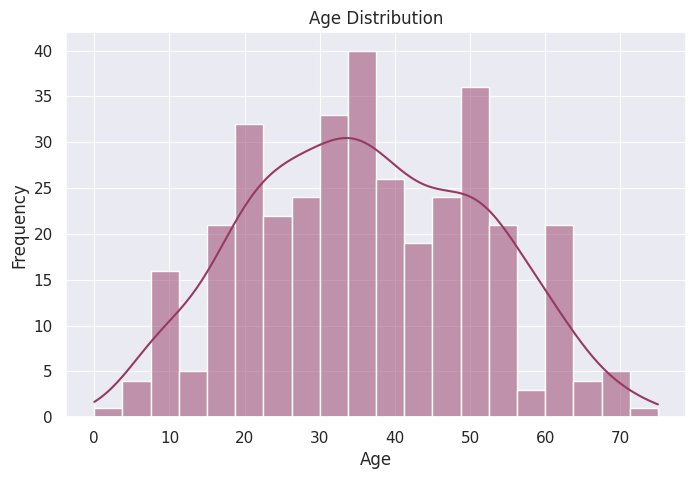

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(data['Age'], bins=20, kde=True, color="#963963")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


## 4.2 Target Variable Distribution

- Class 1 has the highest samples, while Class 6 has the lowest.

- The dataset shows class imbalance.

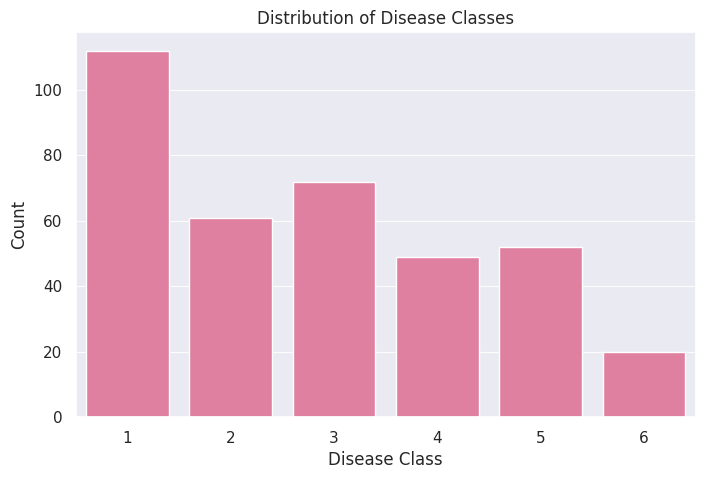

class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x='class', data=data, color = "#ef709b")
plt.title("Distribution of Disease Classes")
plt.xlabel("Disease Class")
plt.ylabel("Count")
plt.show()

#counts numerically
data['class'].value_counts()


## 4.3 Erythema Diseases Count

- Symptom Severity: Erythema (redness of the skin) is measured on a scale of 0 to 3.

- Most Common Grade: A grade of 2 is overwhelmingly the most common presentation in this patient group (over 200 cases).

- Rarity of Grade 0: Very few patients show no erythema (grade 0), indicating it is a primary symptom for the majority of these conditions.

<Axes: xlabel='erythema', ylabel='count'>

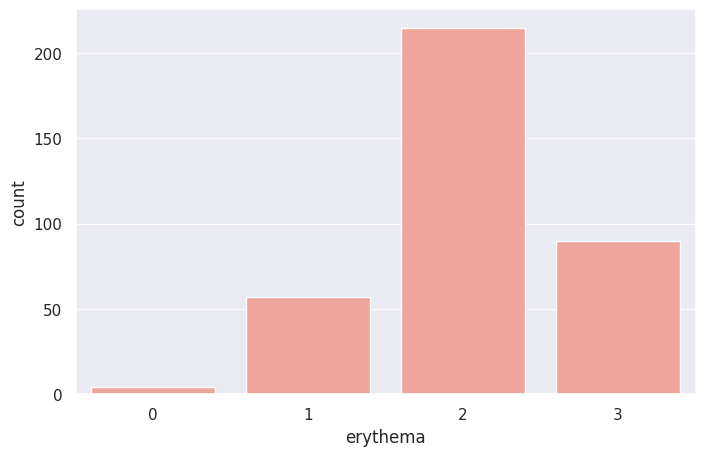

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x="erythema", data= data, color = "#FB9B8F")

## 4.4 Age vs Class

- Class 6 is Unique: Patients in Class 6 are significantly younger (mostly under 15 years old) compared to all other classes. This is a strong feature for classification.
- Family History Impact: * In Class 2, patients with a family history (1) have a much wider variance in age (indicated by the long black error bar) compared to those without.

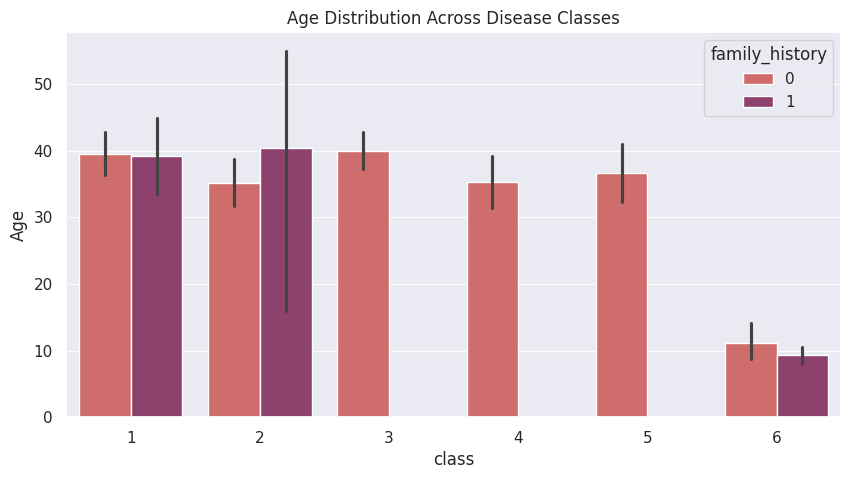

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x='class', y='Age', data=data, hue="family_history",palette="flare")
plt.title("Age Distribution Across Disease Classes")
plt.show()


## 4.5 Correlation Heatmap

- **Strong Feature Clusters**: High correlation exists between polygonal papules, oral mucosal involvement, and saw-tooth appearance, indicating they often occur together in specific diseases.

- **Psoriasis Indicators**: Features like clubbing of rete ridges and thinning of epidermis are strongly linked, forming a distinct diagnostic cluster.

- **Feature Redundancy**: Follicular horn plug and perifollicular parakeratosis are nearly perfectly correlated, meaning one could likely be removed to simplify a model.

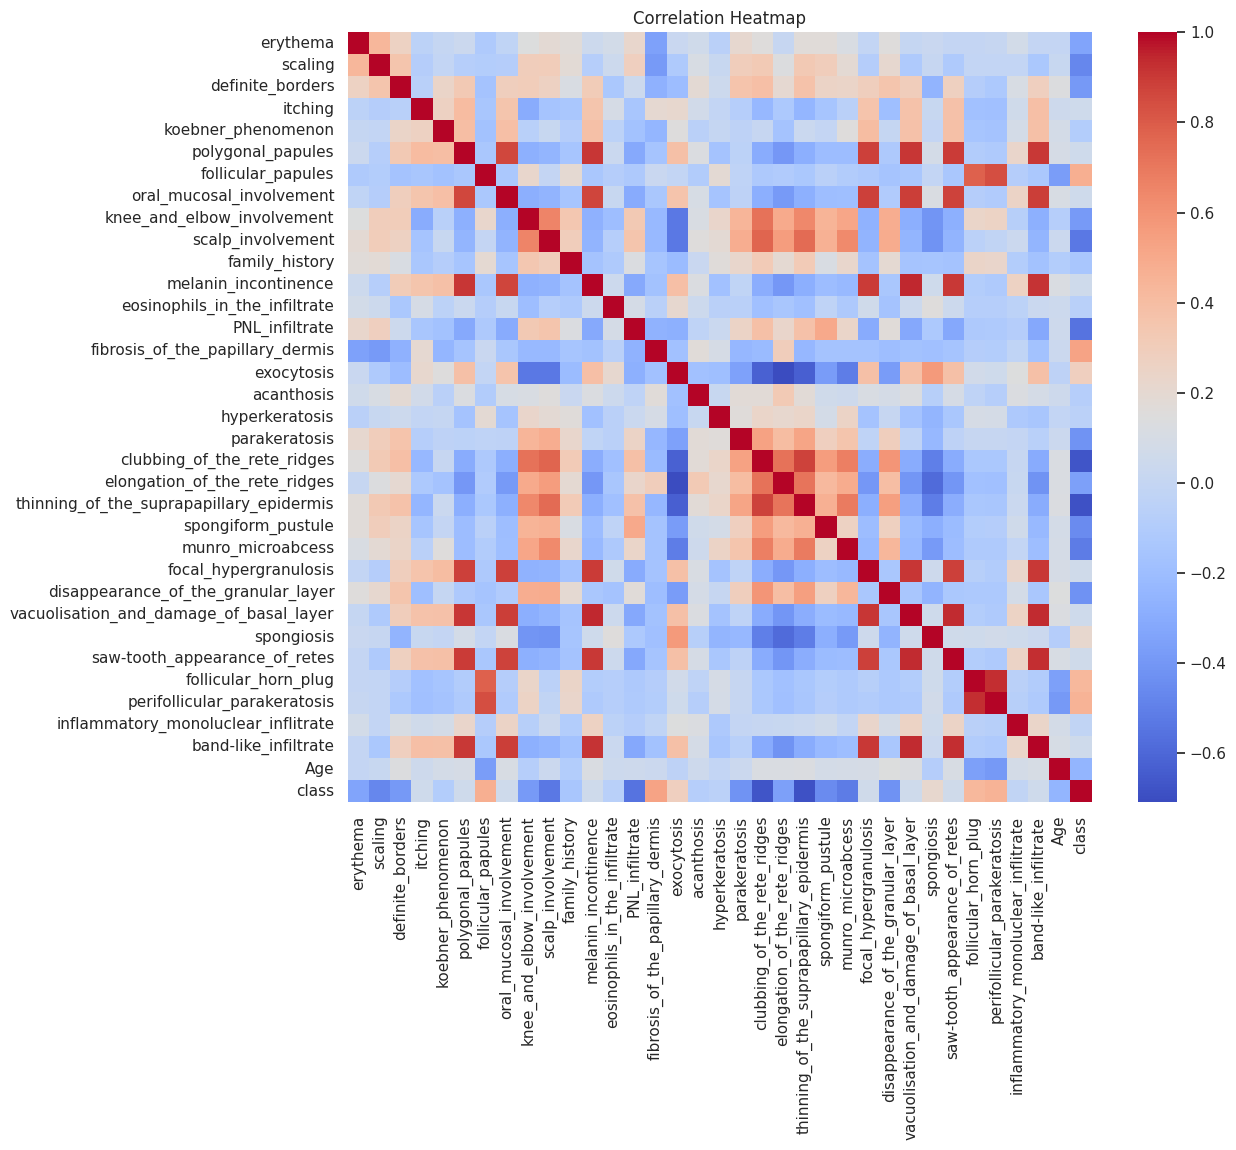

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## 4.6 Target Distribution

In [21]:
disease_names = {
    1: 'Psoriasis',
    2: 'Seborrheic Dermatitis',
    3: 'Lichen Planus',
    4: 'Pityriasis Rosea',
    5: 'Chronic Dermatitis',
    6: 'Pityriasis Rubra Pilaris'
}

data["Disease_df"] = data["class"].map(disease_names)
counts = data["Disease_df"].value_counts().reindex(disease_names.values())
counts

Disease_df
Psoriasis                   112
Seborrheic Dermatitis        61
Lichen Planus                72
Pityriasis Rosea             49
Chronic Dermatitis           52
Pityriasis Rubra Pilaris     20
Name: count, dtype: int64

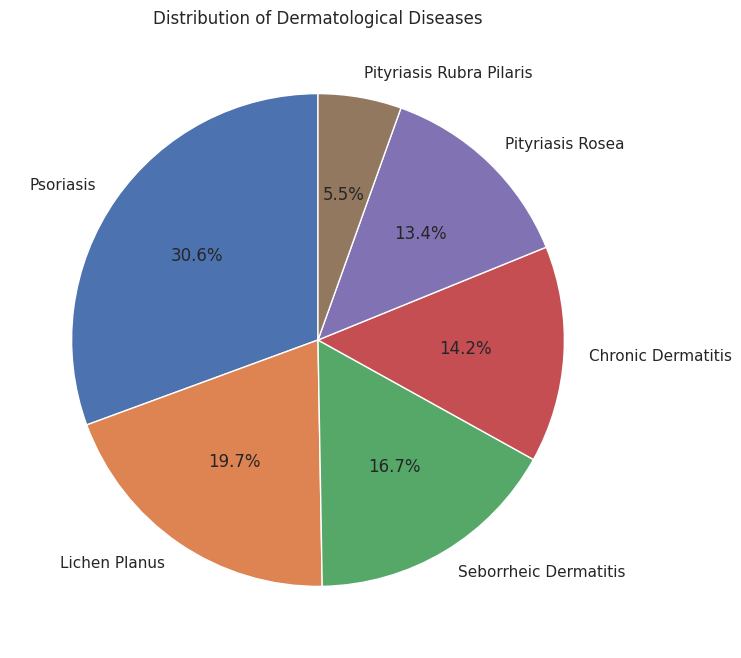

In [22]:
plt.figure(figsize=(8,8))

data['Disease_df'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Distribution of Dermatological Diseases")
plt.ylabel("")
plt.show()


## 4.7 Age vs Class (Diseases) Type

- Pediatric vs. Adult: Pityriasis Rubra Pilaris (n=20) is uniquely a pediatric condition in this set, with a mean age around 10 years.

- Adult Conditions: Psoriasis (n=112), Lichen Planus (n=72), and Chronic Dermatitis (n=52) primarily affect adults, with mean ages clustering between 35 and 40 years.

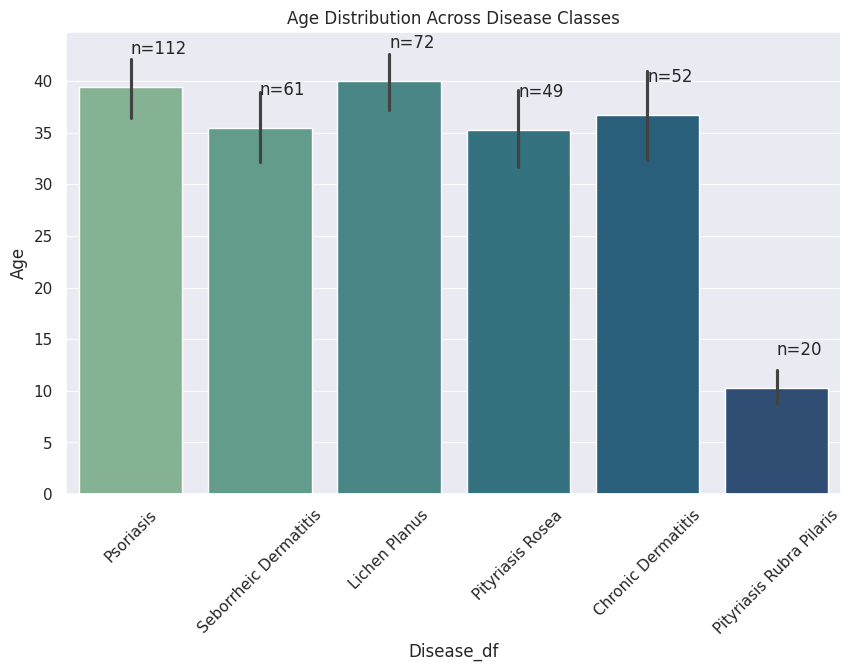

In [23]:
plt.figure(figsize= (10,6))
a = list(disease_names.values())
ax = sns.barplot(data= data, x= "Disease_df", y = "Age",palette = "crest", order = a)

for i, p in enumerate(ax.patches):
  height = p.get_height()
  ax.text(
      p.get_x() + p.get_width()/2.,
      height + 3.2,
      f'n={counts[i]}',
      ha = "left"
  )
plt.title("Age Distribution Across Disease Classes")
plt.xticks(rotation = 45)
plt.show()


In [24]:
data.drop("Disease_df", axis= 1, inplace = True)

# 5. Splitting data into x and y

In [25]:
x = data.drop(["class"], axis = 1)
y = data["class"]

In [26]:
x.shape, y.shape

((366, 34), (366,))

# 4. Pipeline and Column Transformers

## Pipelines and Column Transformers
> A ColumnTransformer is used to apply different preprocessing steps to numerical and clinical features.

* **Age Feature:**
Missing values are handled using median imputation, followed by Min-Max scaling to normalize the values between 0 and 1.

* **Dermatological Features:**

All clinical attributes are directly scaled using Min-Max normalization to ensure uniform feature scaling.


In [27]:
derma_list = [col for col in x.columns if col != "Age"]

# Pipelines
age_pipeline = Pipeline(
    steps = [
        ("simple_imputer", SimpleImputer(strategy = "median")),
        ("min_max", MinMaxScaler())
    ]
)

derma_col = Pipeline(
    steps = [
        ("min_max", MinMaxScaler())
    ]
)


# Column Transformers
transformer = ColumnTransformer(
    transformers= [
        ("pipe1",age_pipeline, ["Age"] ),
        ("pipe2",derma_col, derma_list)
    ],
    remainder = "passthrough"
)

# 5. Loading ML Models
Multiple classification algorithms are used to compare performance and identify the best model for skin disease prediction, including ensemble, linear, distance-based, and tree-based approaches.

In [28]:
models = {
    "Random Forest": RandomForestClassifier(random_state= 42),
    "Logistic Regression": LogisticRegression(max_iter = 1000),
    "SVM" : SVC(kernel= "rbf", random_state = 42),
    "KNN" : KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state =42),
    "Decision Tree": DecisionTreeClassifier(random_state = 45)

}

# 6. Stratified KFold
- It makes sure that each fold has the same class ratio as the original dataset.
- Equal proportion everywhere, in every folds.

In [29]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# 7. Cross Validation Accuracy
Cross-Validation (CV) is a model evaluation technique where the dataset is divided into multiple subsets (folds), and the model is trained and tested multiple times on different combinations of these folds to ensure reliable and unbiased performance estimation.

In [30]:
# Looping Through Models
model_average_mean = []
models_list = []

for name, model in models.items():

  print("=" * 60)
  print(f"\nModel : {name}\n")
  print("=" * 60)

  # Full Pipeline
  final_pipeline = Pipeline(
      steps = [
          ("transformer", transformer),
          ("model", model)
      ]
  )

  # Cross Validation Accuracyy
  scores = cross_val_score(final_pipeline, x, y, cv = skf, scoring = "accuracy")

  # Metrics Evaluation
  print("Cross validation Scores : ", scores)
  print("Mean Accuray of the Model : ", scores.mean())
  print("Standard Deviation : ", scores.std())

  # Confusion Matrix
  ypred = cross_val_predict(final_pipeline, x, y, cv = skf)

  cm = confusion_matrix(y, ypred)
  print("\nConfusion Matrix : ")
  print(cm)

  print("\nClassification Report : ")
  print(classification_report(y,ypred))

  # Appending the Model to list
  models_list.append(name)
  # Appending the Model average accuracy to list
  model_average_mean.append(round(scores.mean() * 100, 2))

  print("\n\n")



Model : Random Forest

Cross validation Scores :  [0.98648649 0.98630137 0.98630137 0.97260274 0.94520548]
Mean Accuray of the Model :  0.9753794890781192
Standard Deviation :  0.016000759638633042

Confusion Matrix : 
[[112   0   0   0   0   0]
 [  1  57   0   3   0   0]
 [  0   0  72   0   0   0]
 [  0   4   0  45   0   0]
 [  0   0   0   0  52   0]
 [  1   0   0   0   0  19]]

Classification Report : 
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       112
           2       0.93      0.93      0.93        61
           3       1.00      1.00      1.00        72
           4       0.94      0.92      0.93        49
           5       1.00      1.00      1.00        52
           6       1.00      0.95      0.97        20

    accuracy                           0.98       366
   macro avg       0.98      0.97      0.97       366
weighted avg       0.98      0.98      0.98       366





Model : Logistic Regression

Cross validatio

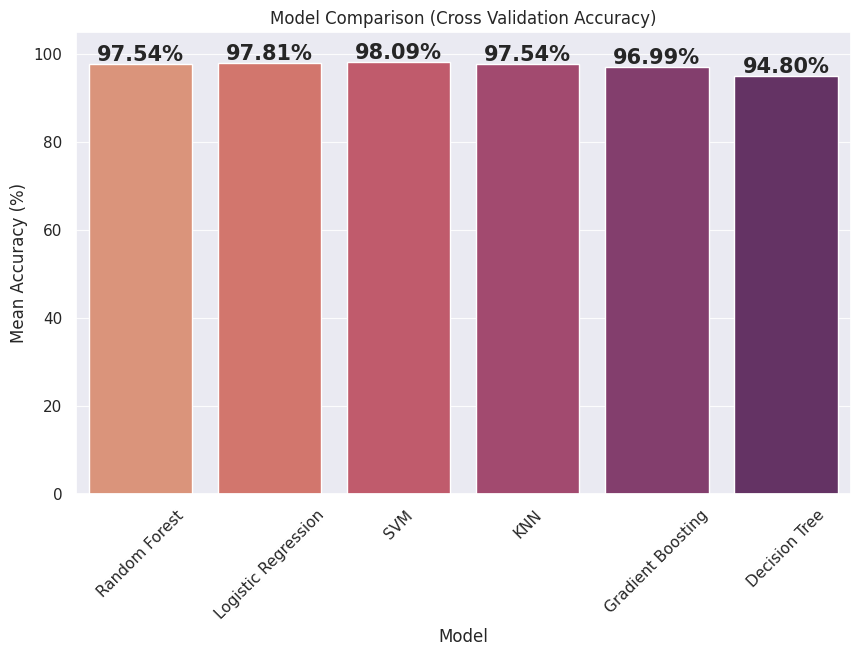

In [31]:
models_accuracy = dict(zip(models_list, model_average_mean))
m = pd.DataFrame({
    "Model" : models_list,
    "Mean Accuracy" : model_average_mean
})

plt.figure(figsize=(10,6))

ax = sns.barplot(x="Model", y="Mean Accuracy", data=m, palette = "flare")

plt.xticks(rotation=45)

# 🔹 Add percentage labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=15,
                fontweight='bold')

plt.title("Model Comparison (Cross Validation Accuracy)")
plt.ylabel("Mean Accuracy (%)")
plt.ylim(0, 105)   # little space for text above bars

plt.show()


## Comparing the Model Mean Accuracy


| Model               | Mean Accuracy | Std Dev    |
| ------------------- | ------------- | ---------- |
| Random Forest       | 0.9753        | 0.0160     |
| Logistic Regression | 0.9781        | 0.0109     |
| 🥇 SVM              | **0.9808**    | **0.0067** |
| KNN                 | 0.9753        | 0.0134     |
| Gradient Boosting   | 0.9699        | 0.0055     |
| Decision Tree       | 0.9480        | 0.0280     |






> ***Accuracy*** *is a metric measures the proportion of correct predictions out of the total number of predictions made by a model.*

> ***Standard deviation*** *in the context of k-fold cross-validation tells you how consistent model's performance is across different folds.*

- - low std =  model is stable and generalizes well.
- - high std = model's performance varies significantly


# 8. Model Selection 

Model Selection involves choosing the best-performing algorithm by evaluating and comparing multiple models on the dataset.

## 🥇 Best Model Perform = SVM
- High Mean Accuracy (98.08%)
- Low Std (0.0067)

In [32]:
#Model Selection
print("Best Performing Model Was SVM")
print(f"Mean Accuracy: {models_accuracy["SVM"]}")

Best Performing Model Was SVM
Mean Accuracy: 98.09


# 9. Hyperparameter tuning on SVM
SVM model is integrated with the preprocessing pipeline, enabling probability estimation and handling class imbalance for effective hyperparameter tuning.

In [33]:
# Final Pipeline (Preproccsing + SVM)

final_pipeline= Pipeline(
    steps = [
        ("transformer", transformer),
       ("model", SVC(probability = True, class_weight = "balanced")) #adjusts weights automatically to handle class imbalance.
    ]
)

In [34]:
# Hyperparameter Grid

param_grid = {
    "model__C" : [0.1, 0.5, 1, 10, 100], # Strictness Control
    "model__gamma" : [0.1, 0.01, 0.001, 0.0001], # Curve Tightness
    "model__kernel" :["rbf"] # RBF can create curved decision boundaries.
}

In [35]:
# Stratified K-Fold

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [36]:
# Grid Search

grid = GridSearchCV(
    estimator= final_pipeline,
    param_grid = param_grid,
    cv = skf,
    scoring ="f1_macro",
    n_jobs = -1

)
grid.fit(x,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe1',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('min_max',
                                                                                          MinMaxScaler())]),
                                                                         ['Age']),
                                                                        ('pipe2',
                                                                         Pipeline(steps=[('min_max',
                                                                                          MinMaxScaler())]),
                                                                         ['erythema'...
                                                                          'disappearance_of_the_granular_layer',
                                                                          'vacuolisation_and_damage_of_basal_layer',
                                                                          'spongiosis',
                                                                          'saw-tooth_appearance_of_retes',
                                                                          'follicular_horn_plug', ...])])),
                                       ('model',
                                        SVC(class_weight='balanced',
                                            probability=True))]),
             n_jobs=-1,
             param_grid={'model__C': [0.1, 0.5, 1, 10, 100],
                         'model__gamma': [0.1, 0.01, 0.001, 0.0001],
                         'model__kernel': ['rbf']},
             scoring='f1_macro')

In [37]:
# Best Parameters

print("Best Parameters: ", grid.best_params_)
print("Best Cross Validated F1 Score : ", grid.best_score_)

Best Parameters:  {'model__C': 1, 'model__gamma': 0.1, 'model__kernel': 'rbf'}
Best Cross Validated F1 Score :  0.9753116046594308



Confusion Matrix : 

Classification Reprt: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       112
           2       0.96      0.90      0.93        61
           3       1.00      1.00      1.00        72
           4       0.89      0.96      0.92        49
           5       1.00      1.00      1.00        52
           6       1.00      1.00      1.00        20

    accuracy                           0.98       366
   macro avg       0.98      0.98      0.98       366
weighted avg       0.98      0.98      0.98       366



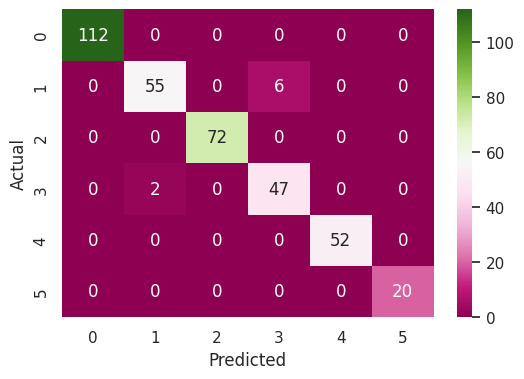

In [38]:
# Confusion Matrix ( Cross Validation)

SVM_best_model = grid.best_estimator_
y_pred = cross_val_predict(SVM_best_model, x, y, cv = skf)
cm = confusion_matrix(y , y_pred)

print("\nConfusion Matrix : ")

plt.figure(figsize= (6,4))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "PiYG")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Classification Report
print("\nClassification Reprt: ")
print(classification_report(y, y_pred))

# 10 Checking Missclassify

In [39]:
misclassified = np.where(y != y_pred)[0]
print("Misclassified indices:", misclassified)
print("Number of misclassified:", len(misclassified))

Misclassified indices: [ 43 140 161 257 284 285 346 359]
Number of misclassified: 8


In [40]:
y.iloc[misclassified]

43     2
140    2
161    2
257    4
284    2
285    2
346    4
359    2
Name: class, dtype: int64

In [41]:
for i in misclassified:
    print(f"Index {i} → True: {y.iloc[i]}, Predicted: {y_pred[i]}")


Index 43 → True: 2, Predicted: 4
Index 140 → True: 2, Predicted: 4
Index 161 → True: 2, Predicted: 4
Index 257 → True: 4, Predicted: 2
Index 284 → True: 2, Predicted: 4
Index 285 → True: 2, Predicted: 4
Index 346 → True: 4, Predicted: 2
Index 359 → True: 2, Predicted: 4


## In Dermatology dataset:

> - #### Class 2 = Seborrheic Dermatitis
> - #### Class 4 = Pityriasis Rosea


#### Clinically, these two can have:

- Similar scaling patterns

- Similar erythema values

- Similar lesion distribution

#### The misclassifications occur only between class 2 and class 4, suggesting overlapping feature characteristics. 
#### The SVM model performs very well overall, but due to similarity in clinical attributes between these two classes, a few borderline samples fall on the opposite side of the hyperplane.

# 11 . Saving Best Model

In [42]:
# Saving best estimator from GridSearch

import pickle

final_model = SVM_best_model

with open("skin_disorder_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

print("Model saved")


Model saved
